In [ ]:
# pip install -U sentence-transformers

In [ ]:
%pylab inline

# Imports
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
np.random.seed(24)

In [ ]:
questions_df = pd.read_csv("/content/gdrive/MyDrive/rec_system/questions.csv", encoding= 'unicode_escape')
#questions_df = questions_df.loc[questions_df["Average Score"] < 4]

In [ ]:
X = np.array(questions_df.Topics)

In [ ]:
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

In [ ]:
embed_data = embeddings

In [ ]:
X = np.array(embed_data)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,-5.656808,6.967856,5.768179,0.916598,1.605924
1,0.760386,-0.968628,3.315362,-0.881687,-2.287509
2,-0.049567,3.768512,-2.368764,-2.422159,1.774514
3,-0.837881,6.632421,-2.474863,0.540378,-0.056609
4,10.555139,2.877868,-0.892708,0.919160,1.056160


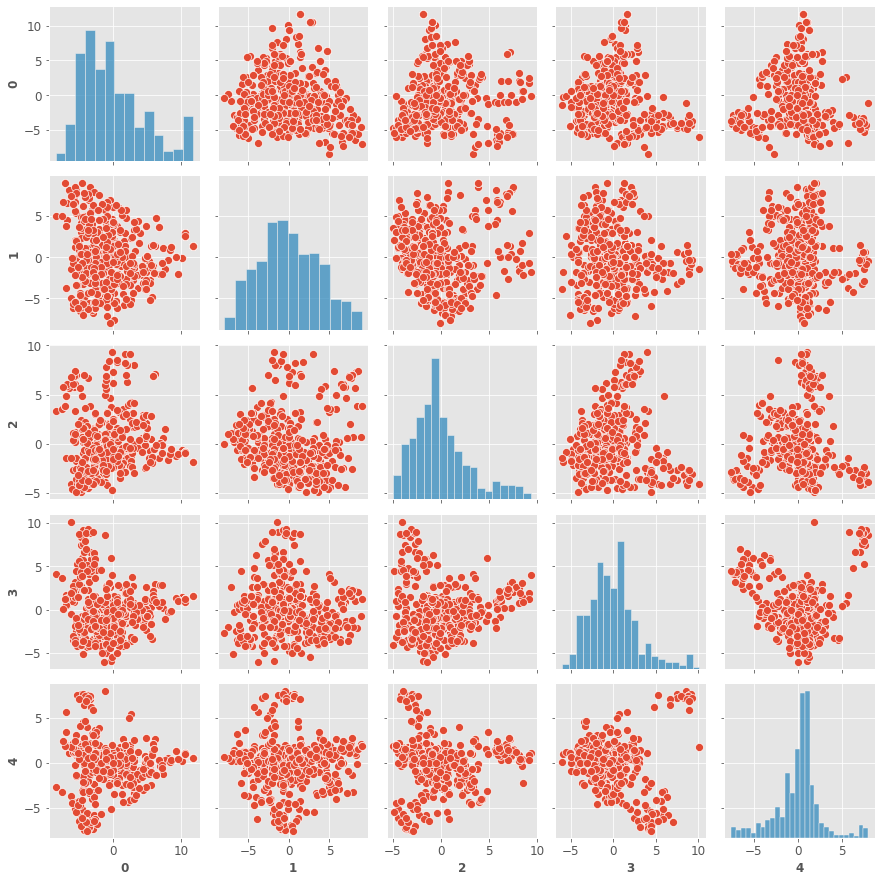

In [ ]:
sns.pairplot(pca_data)

In [ ]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))
def give_recommendations(index,print_recommendation = False,print_recommendation_topics= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:4]
  chapter_recomm =  questions_df['Sections'].loc[index_recomm].values
  result = {'Chapter':chapter_recomm,'Index':index_recomm}
  if print_recommendation==True:
    print('This question is covered in chapters: %s \n'%(questions_df['Sections'].loc[index]))
    k=1
    for chapter in chapter_recomm:
      print('The number %i recommended chapter is this one: %s \n'%(k,chapter))
  if print_recommendation_topics==True:
    print('The topics covered in this chapter are:\n %s \n'%(questions_df['Topics'].loc[index]))
    k=1
    for q in range(len(chapter_recomm)):
      plot_q = questions_df['Topics'].loc[index_recomm[q]]
      print('The topics covered in %i recommended chapters are:\n %s \n'%(k,plot_q))
      k=k+1
  if print_genres==True:
    print('The genres of the watched movie is this one:\n %s \n'%(questions_df['tags'].loc[index]))
    k=1
    for q in range(len(chapter_recomm)):
      plot_q = questions_df['tags'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  return result

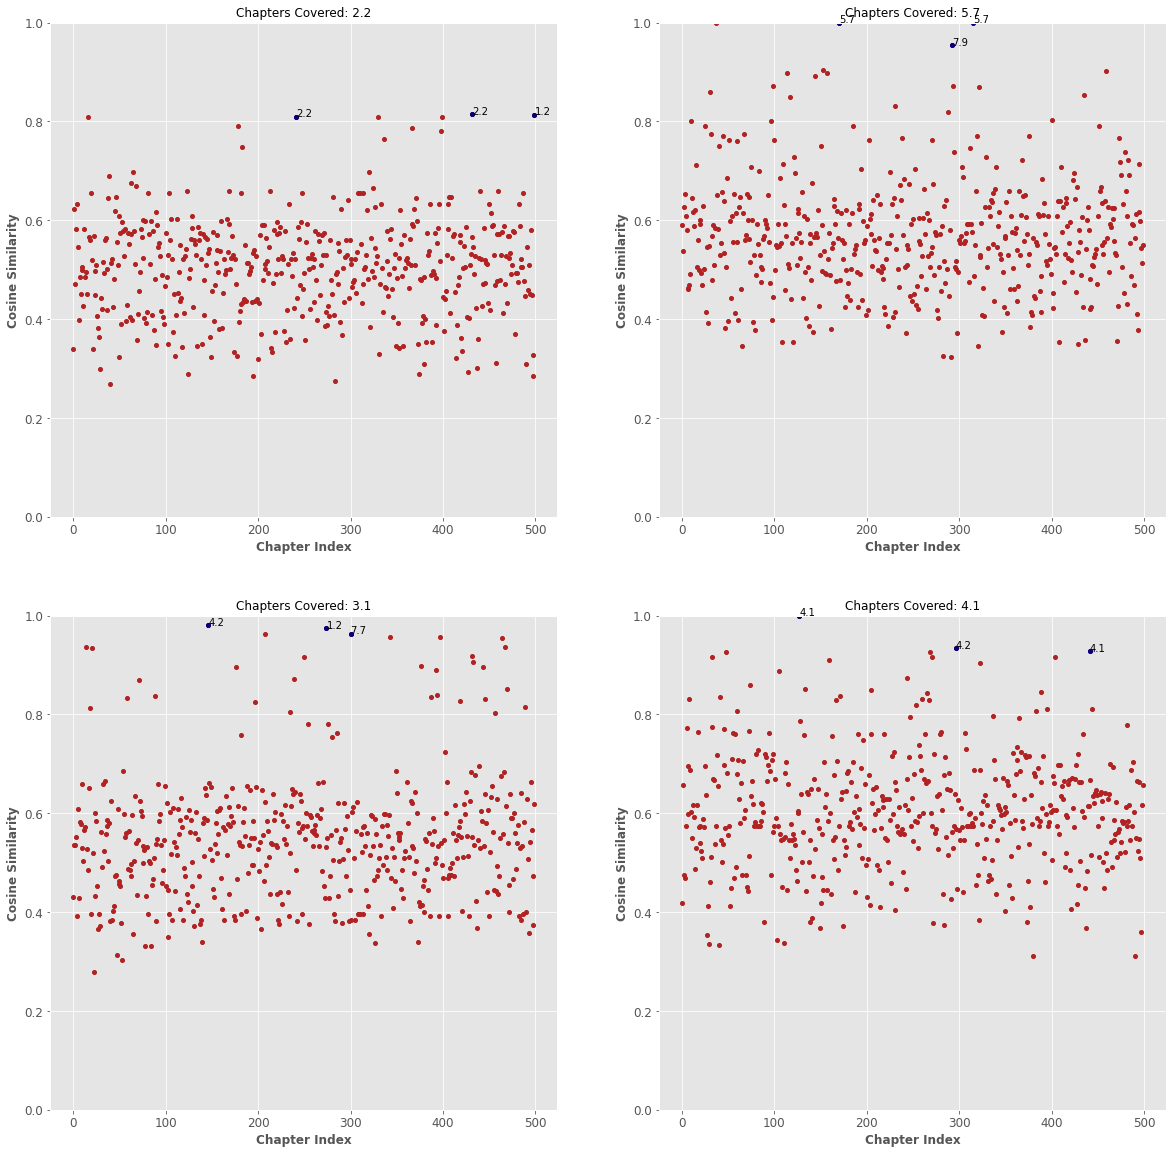

In [ ]:
plt.figure(figsize=(20,20))
for q in range(1,5):
  plt.subplot(2,2,q)
  index = np.random.choice(np.arange(0,len(X)))
  to_plot_data = cos_sim_data.drop(index,axis=1)
  plt.plot(to_plot_data.loc[index],'.',color='firebrick')
  recomm_index = give_recommendations(index)
  x = recomm_index['Index']
  y = cos_sim_data.loc[index][x].tolist()
  m = recomm_index['Chapter']
  plt.plot(x,y,'.',color='navy',label='Recommended Chapter')
  plt.title('Chapters Covered: '+ str(questions_df['Sections'].loc[index]))
  plt.xlabel('Chapter Index')
  k=0
  for x_i in x:
    plt.annotate('%s'%(m[k]),(x_i,y[k]),fontsize=10)
    k=k+1

  plt.ylabel('Cosine Similarity')
  plt.ylim(0,1)

In [ ]:
give_recommendations(2,True)

This question is covered in chapters: 3.2 

The number 1 recommended chapter is this one: 3.2 

The number 1 recommended chapter is this one: 3.2 

The number 1 recommended chapter is this one: 7.5 



{'Chapter': array([3.2, 3.2, 7.5]), 'Index': [332, 304, 122]}

In [ ]:
give_recommendations(2,False,True)

The topics covered in this chapter are:
 Manual Simulation, Schedules 

The topics covered in 1 recommended chapters are:
 Manual Simulation, Schedules 

The topics covered in 2 recommended chapters are:
 Manual Simulation, Manual Simulation 

The topics covered in 3 recommended chapters are:
 Lists, Manual Simulation 



{'Chapter': array([3.2, 3.2, 7.5]), 'Index': [332, 304, 122]}

In [ ]:
give_recommendations(65,True,True,True)

This question is covered in chapters: 2.2 

The number 1 recommended chapter is this one: 2.2 

The number 1 recommended chapter is this one: 3.1 

The number 1 recommended chapter is this one: 4.3 

The topics covered in this chapter are:
 Little's Law and Other Relations,  About the Book 

The topics covered in 1 recommended chapters are:
 Little's Law and Other Relations,  About the Book 

The topics covered in 2 recommended chapters are:
 Kinds of Simulation,  About the Book 

The topics covered in 3 recommended chapters are:
 Random - Number Generators,  About the Book 

The genres of the watched movie is this one:
 balking, animation 

The plot of the number 1 recommended movie is this one:
 balking, animation 

The plot of the number 2 recommended movie is this one:
 boolean, animation 

The plot of the number 3 recommended movie is this one:
 dot notation, animation 



{'Chapter': array([2.2, 3.1, 4.3]), 'Index': [320, 151, 47]}

In [ ]:
recomm_list = []
for i in range(len(X)):
  recomm_i = give_recommendations(i)
  recomm_list.append(recomm_i['Chapter'])

recomm_data = pd.DataFrame(recomm_list,columns=['First Recommendation','Second Recommendation','Third Recommendation'])
recomm_data['Question #'] = questions_df['ID']
recomm_data['Covered Section'] = questions_df['Topics']
recomm_data["Average Score"] = questions_df['Average Score']
recomm_data = recomm_data[['Covered Section', 'Question #', 'Average Score','First Recommendation','Second Recommendation','Third Recommendation']]

In [ ]:
recomm_data.sort_values(by=['Average Score'], ascending = True).head()

,Covered Section,Question #,Average Score,First Recommendation,Second Recommendation,Third Recommendation
0,First Project Using the Standard Library Objec...,1,0,5.2,5.2,8.2
190,"Random - Number Generators, Comparing Multiple...",191,0,4.3,4.3,4.4
196,"Queueing THeory vs. Simulation, Problems",197,0,6.7,2.5,2.5
199,"Automated Teller Machine (ATM), Problems",200,0,7.7,5.4,5.4
200,"Enhanced PCB Assembly, Simulation Success Skills",201,0,1.4,6.3,6.4


In [ ]:
recomm_data.sample(frac=1).head()

,Covered Section,Question #,Average Score,First Recommendation,Second Recommendation,Third Recommendation
69,"Queueing THeory vs. Simulation, First Project ...",70,2,1.4,5.2,5.2
206,"About the Book, Types of Inputs",207,2,1.1,3.1,1.1
124,First Project Using the Standard Library Objec...,125,0,5.2,5.2,5.2
454,"When to Simulate (and When Not To), Purpose Si...",455,3,3.5,3.1,1.3
30,"The Basic Simio User Interface, Basic Model An...",31,2,8.3,5.7,5.7
